In [1]:
import pandas as pd
import numpy as np

In [2]:
cities = ['Tartu','Riia','Oslo','Kopenhaagen']

In [3]:
signups = [7,12,3,5]

In [4]:
visitors = [138,241,312,513]

In [5]:
weekdays = ['Sun','Sun','Sat','Sat']

In [6]:
list_labels = ['city','signups','visitors','weekday']
list_cols = [cities, signups,visitors,weekdays]

In [7]:
 zipped = list(zip(list_labels, list_cols))

In [8]:
zipped

[('city', ['Tartu', 'Riia', 'Oslo', 'Kopenhaagen']),
 ('signups', [7, 12, 3, 5]),
 ('visitors', [138, 241, 312, 513]),
 ('weekday', ['Sun', 'Sun', 'Sat', 'Sat'])]

In [9]:
data = dict(zipped)
users = pd.DataFrame(data)

In [10]:
users['fees'] = 0

In [11]:
users

,city,signups,visitors,weekday,fees
0,Tartu,7,138,Sun,0
1,Riia,12,241,Sun,0
2,Oslo,3,312,Sat,0
3,Kopenhaagen,5,513,Sat,0


# Broadcasting with dict

In [12]:
heights = [5.90, 65.2, 65.9,65.4,63.7,65.7,64.1]

In [13]:
data = {'heights':heights,'sex':'M'}

In [14]:
results = pd.DataFrame(data)

In [15]:
results

,heights,sex
0,5.9,M
1,65.2,M
2,65.9,M
3,65.4,M
4,63.7,M
5,65.7,M
6,64.1,M


In [16]:
results.columns = ['height (inches)','sex']

In [17]:
results

,height (inches),sex
0,5.9,M
1,65.2,M
2,65.9,M
3,65.4,M
4,63.7,M
5,65.7,M
6,64.1,M


In [44]:
results.index = ['A','B','C','D','E','F','G'] # length needs to match the object length

In [45]:
results

,height (inches),sex
A,5.9,M
B,65.2,M
C,65.9,M
D,65.4,M
E,63.7,M
F,65.7,M
G,64.1,M


## Reading from and writing to csv files

In [46]:
filepath = 'silso.csv'
col_names = ['year','month','day','dec_date','sunspots','deviation','observations','definite']

In [47]:

df = pd.read_csv(filepath,header=None,sep=';',names=col_names, na_values=['  -1'],parse_dates=[[0,1,2]])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73445 entries, 0 to 73444
Data columns (total 6 columns):
year_month_day    73445 non-null datetime64[ns]
dec_date          73445 non-null float64
sunspots          70198 non-null float64
deviation         70198 non-null float64
observations      73445 non-null int64
definite          73445 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.4 MB


In [49]:
df.iloc[10:20,:]

,year_month_day,dec_date,sunspots,deviation,observations,definite
10,1818-01-11,1818.029,NaN,NaN,0,1
11,1818-01-12,1818.032,NaN,NaN,0,1
12,1818-01-13,1818.034,37.0,7.7,1,1
13,1818-01-14,1818.037,NaN,NaN,0,1
14,1818-01-15,1818.040,NaN,NaN,0,1
15,1818-01-16,1818.042,NaN,NaN,0,1
16,1818-01-17,1818.045,77.0,11.1,1,1
17,1818-01-18,1818.048,98.0,12.6,1,1
18,1818-01-19,1818.051,105.0,13.0,1,1
19,1818-01-20,1818.053,NaN,NaN,0,1


In [50]:
df.index = df['year_month_day']

In [51]:
df.index.name = 'date'

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73445 entries, 1818-01-01 to 2019-01-31
Data columns (total 6 columns):
year_month_day    73445 non-null datetime64[ns]
dec_date          73445 non-null float64
sunspots          70198 non-null float64
deviation         70198 non-null float64
observations      73445 non-null int64
definite          73445 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.9 MB


In [53]:
cols = ['sunspots','definite']

In [54]:
sunspots = df[cols]

In [55]:
sunspots.iloc[10:20,:]

,sunspots,definite
date,,
1818-01-11,NaN,1
1818-01-12,NaN,1
1818-01-13,37.0,1
1818-01-14,NaN,1
1818-01-15,NaN,1
1818-01-16,NaN,1
1818-01-17,77.0,1
1818-01-18,98.0,1
1818-01-19,105.0,1


In [56]:
out_csv = 'sunspots.csv'

In [57]:
sunspots.to_csv(out_csv)

In [58]:
out_tsv = 'sunspots.tsv'

In [59]:
sunspots.to_csv(out_tsv,sep='\t')

In [60]:
out_xlsx = 'sunspots.xlsx'

In [61]:
sunspots.to_excel(out_xlsx)

## Plotting

In [62]:
import matplotlib.pyplot as plt

In [63]:
aapl = pd.read_csv('AAPL.csv',index_col='Date', parse_dates=True)

In [64]:
aapl.head(6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-08,149.559998,151.820007,148.520004,150.750000,150.750000,41025300
2019-01-09,151.289993,154.529999,149.630005,153.309998,153.309998,45099100
2019-01-10,152.500000,153.970001,150.860001,153.800003,153.800003,35780700
2019-01-11,152.880005,153.699997,151.509995,152.289993,152.289993,27023200
2019-01-14,150.850006,151.270004,149.220001,150.000000,150.000000,32439200
2019-01-15,150.270004,153.389999,150.050003,153.070007,153.070007,28710900


In [65]:
close_arr = aapl['Close'].values

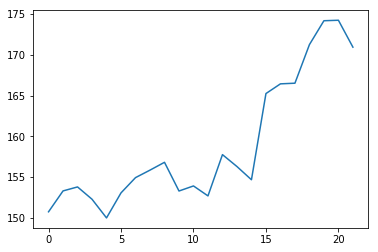

In [66]:
plt.plot(close_arr)

In [67]:
close_series = aapl['Close']

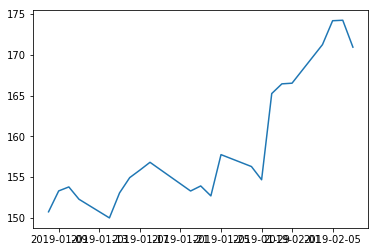

In [68]:
plt.plot(close_series)

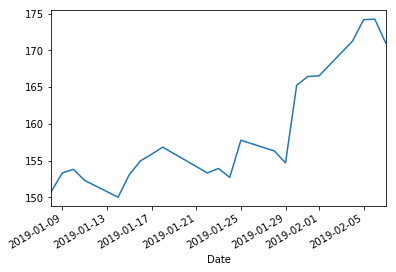

In [69]:
close_series.plot()

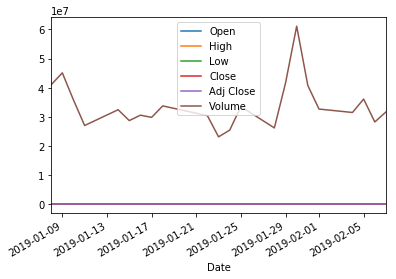

In [72]:
aapl.plot()

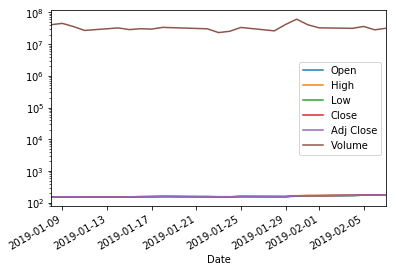

In [76]:
aapl.plot()
plt.yscale('log')

('2019-01', '2019-02', 150, 160)

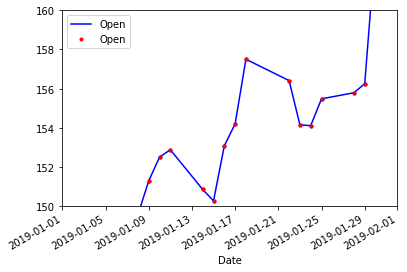

In [86]:
aapl['Open'].plot(color='b',style='.-',legend=True)
aapl['Open'].plot(color='r',style='.',legend=True)

plt.axis(('2019-01','2019-02',150,160))

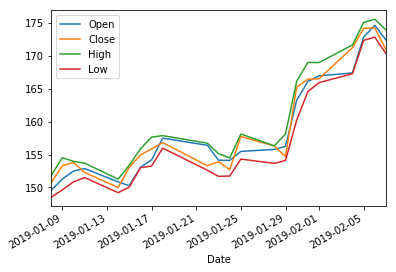

In [99]:
aapl.loc['2019-01':'2019-03',['Open','Close','High','Low']].plot()
plt.get_figure().savefig('aapl.png')
plt.get_figure().savefig('aapl.svg')
plt.get_figure().savefig('aapl.pdf')

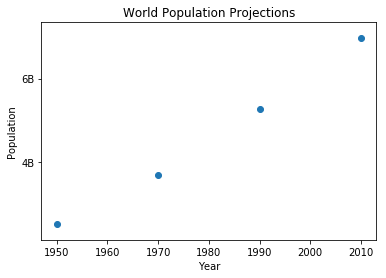

In [120]:
import matplotlib.pyplot as plt
year = [1950,1970,1990,2010]
pop = [2.519,3.692,5.263,6.972]
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population Projections')
plt.yticks([0,2,4,6,8,10],['O','2B','4B','6B','8B','10B'])
dev = plt.scatter(year, pop)

In [114]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of
        

(array([4., 6., 2.]), array([0., 2., 4., 6.]), <a list of 3 Patch objects>)

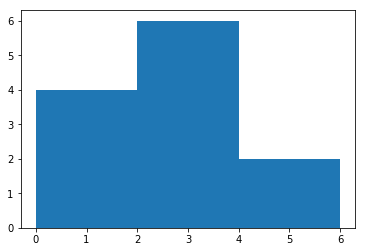

In [116]:
values = [0,0.6,1.4,1.6,2.2,2.5,2.6,3.2,3.5,3.9,4.2,6]
plt.hist(values, bins=3)